In [165]:
import pandas as pd
import numpy as np
import math
from scipy import special
import matplotlib.pyplot as plt
import statsmodels.stats.weightstats as sm
from matplotlib import cm

In [166]:
# N_steps = 10
N_steps_orig = 1800 
N_k = 64
T_h = 18000
N_x = 21
N_y = 21

### Define input files


In [167]:
result_loc = "./../../../../Server_results/5_9_2022/"
run_name = "experiment09_05_16_29_39"

# result_loc = "./../../../../Server_results/10_12_2021_mul_q/"
# run_name = "experiment10_10_22_51_50"

# result_loc = "./../../../../Server_results/10_24_2021_less_tol/"
# run_name = "experiment23_10_01_07_23"

train_loc = "Run_no_zero_flow_no_oscilations_Run_Run_1646968123/"

# run_name = "experiment06_10_11_17_57"
# train_loc = "Run_no_zero_flow_no_oscilations_Run_Run_1633466607/"

### Load files and reshape them

In [168]:

p = np.loadtxt(f"{result_loc}{run_name}p.txt")
p = p.reshape([-1,N_k])

N_epoch = p.shape[0]

q_x = np.loadtxt(f"{result_loc}{run_name}q_x.txt")
q_x = q_x.reshape([N_epoch,N_k,-1])
q_y = np.loadtxt(f"{result_loc}{run_name}q_y.txt")
q_y = q_y.reshape([N_epoch,N_k,-1])
k_x = np.loadtxt(f"{result_loc}{run_name}k_x.txt")
k_x = k_x.reshape([N_epoch,N_k,-1])
k_y = np.loadtxt(f"{result_loc}{run_name}k_y.txt")
k_y = k_y.reshape([N_epoch,N_k,-1])
k_xy = np.loadtxt(f"{result_loc}{run_name}k_xy.txt")
k_xy = k_xy.reshape([N_epoch,N_k,-1])

lam = np.loadtxt(f"{result_loc}{run_name}lambda.txt")

N_steps = q_x.shape[2]

In [169]:
q_x.shape

(95, 64, 50)

In [170]:
def plot_cdf(p,qoi,time_step,epoch,label=''):
    P = p[epoch]
    QOI = qoi[epoch,:,time_step]

    index = np.argsort(QOI)
    plt.plot(np.ravel([QOI[index],QOI[index]],'f'),np.ravel([np.array([0,*np.cumsum(P[index])[:-1]]),np.cumsum(P[index])],'F'),label=label)

Evolution of cdf for different lambda

In [171]:
q_MC_x = np.loadtxt(f"{train_loc}Q_x_mid.txt")
q_MC_y = np.loadtxt(f"{train_loc}Q_y_mid.txt")


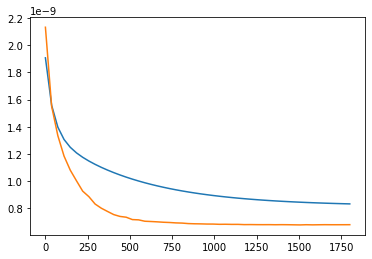

In [172]:
epoch = 10
plt.plot(np.linspace(1,1800,N_steps),np.inner(q_y[epoch,:,:].T,p[epoch,:]))
epoch = 1
plt.plot(np.linspace(1,1800,N_steps),np.inner(q_y[epoch,:,:].T,p[epoch,:]))


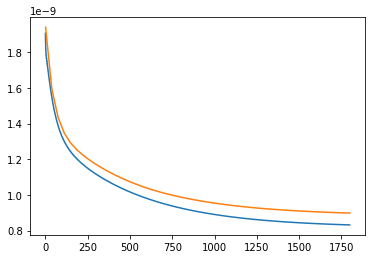

In [182]:
epoch = 80


plt.plot(q_MC_y.mean(axis=0))
# plt.plot(q_MC_y.min(axis=0))
# plt.plot(q_MC_y.max(axis=0))

# plt.plot(q_MC_y.min(axis=0))
# plt.plot(q_MC_y.max(axis=0))
plt.plot(np.linspace(1,1800,N_steps),np.inner(q_y[epoch,:,:].T,p[epoch,:]))
# plt.plot(np.linspace(1,1800,N_steps),q_y[epoch,0:4,:].max(axis=0))
# plt.plot(np.linspace(1,1800,N_steps),q_y[epoch,0:4,:].min(axis=0))

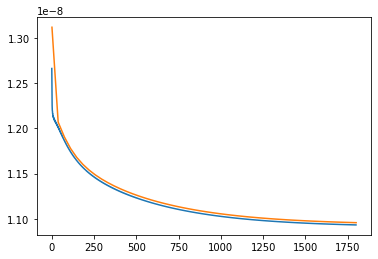

In [186]:
epoch = 80
plt.plot(q_MC_x.mean(axis=0))
# plt.plot(q_MC_x.min(axis=0))
# plt.plot(q_MC_x.max(axis=0))

plt.plot(np.linspace(1,1800,N_steps),np.inner(q_x[epoch,:,:].T,p[epoch,:]))
# plt.plot(np.linspace(1,1800,N_steps),q_x[epoch,0:4,:].max(axis=0))
# plt.plot(np.linspace(1,1800,N_steps),q_x[epoch,0:4,:].min(axis=0))

In [175]:
p[50,:]

array([1.25000000e-01, 1.25000000e-01, 1.25000000e-01, 1.25000000e-01,
       1.25000000e-01, 1.25000000e-01, 1.25000000e-01, 1.25000000e-01,
       4.65009497e-45, 4.65009497e-45, 4.65009497e-45, 4.65009497e-45,
       4.65009497e-45, 4.65009497e-45, 4.65009497e-45, 4.65009497e-45,
       4.65009497e-45, 4.65009497e-45, 4.65009497e-45, 4.65009497e-45,
       4.65009497e-45, 4.65009497e-45, 4.65009497e-45, 4.65009497e-45,
       4.65009497e-45, 4.65009497e-45, 4.65009497e-45, 4.65009497e-45,
       4.65009497e-45, 4.65009497e-45, 4.65009497e-45, 4.65009497e-45,
       4.65009497e-45, 4.65009497e-45, 4.65009497e-45, 4.65009497e-45,
       4.65009497e-45, 4.65009497e-45, 4.65009497e-45, 4.65009497e-45,
       4.65009497e-45, 4.65009497e-45, 4.65009497e-45, 4.65009497e-45,
       4.65009497e-45, 4.65009497e-45, 4.65009497e-45, 4.65009497e-45,
       4.65009497e-45, 4.65009497e-45, 4.65009497e-45, 4.65009497e-45,
       4.65009497e-45, 4.65009497e-45, 4.65009497e-45, 4.65009497e-45,
      

In [176]:
k_x[50,:,40]

array([9.75639014e-06, 9.85739293e-06, 9.27524955e-06, 9.80002245e-06,
       9.49434191e-06, 9.12150793e-06, 9.27614304e-06, 9.95071331e-06,
       1.00474071e-05, 9.94467112e-06, 1.00212553e-05, 9.97711366e-06,
       9.96429408e-06, 1.00376424e-05, 1.00084530e-05, 1.00449795e-05,
       9.96287167e-06, 9.98321751e-06, 9.97405693e-06, 1.00018424e-05,
       1.00074388e-05, 9.96900851e-06, 9.99359004e-06, 9.98795478e-06,
       1.00173195e-05, 9.98669864e-06, 1.00229190e-05, 1.00455363e-05,
       1.00446829e-05, 1.00040162e-05, 1.00013509e-05, 1.00144528e-05,
       1.00242401e-05, 9.96456849e-06, 1.00125972e-05, 1.00156274e-05,
       9.96310868e-06, 9.99821993e-06, 1.00273561e-05, 9.96672211e-06,
       9.99153585e-06, 1.00051025e-05, 1.00173659e-05, 9.97316454e-06,
       1.00173848e-05, 9.95526267e-06, 1.00207769e-05, 9.98054634e-06,
       9.95978149e-06, 9.99325957e-06, 9.99823411e-06, 1.00033866e-05,
       9.98398217e-06, 9.96936750e-06, 1.00112015e-05, 9.99956556e-06,
      

In [177]:
k_xy[36,:,40]

array([ 2.32868300e-06, -1.87646356e-07,  1.16564611e-06, -1.71100791e-07,
       -1.05853371e-07, -7.97868613e-08, -4.02835640e-08, -1.09532058e-07,
       -9.35816264e-08, -4.16766498e-08, -6.32468798e-08, -4.61502010e-08,
       -7.14966949e-08, -1.05335198e-07, -6.86492471e-08, -9.45646805e-08,
       -7.54708778e-08, -4.31497531e-08, -8.14575951e-08, -1.16304560e-07,
       -1.08943622e-07, -8.99812644e-08, -8.88816901e-08, -9.76634158e-08,
       -8.70732355e-08, -6.29480638e-08, -1.04424249e-07, -1.07281966e-07,
       -8.64183564e-08, -9.05325818e-08, -8.51462013e-08, -1.02110650e-07,
       -1.18383795e-07, -7.47985283e-08, -8.40751566e-08, -4.77733998e-08,
       -5.91189652e-08, -8.31562625e-08, -9.33399373e-08, -4.81831731e-08,
       -4.97701904e-08, -9.93881769e-08, -5.06074978e-08, -7.13093700e-08,
       -8.40534879e-08, -5.38994585e-08, -1.13392878e-07, -8.58291354e-08,
       -6.09465787e-08, -1.13750578e-07, -1.00288326e-07, -9.38613708e-08,
       -4.64706365e-08, -

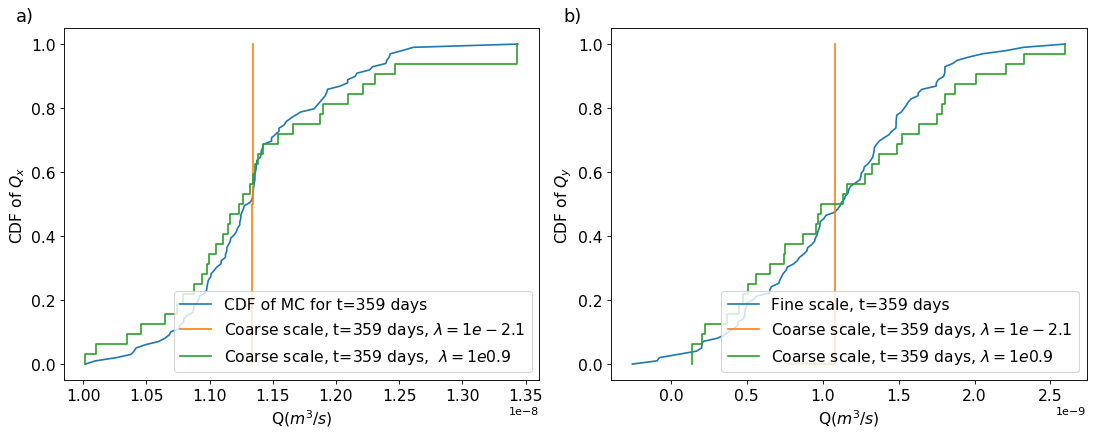

In [179]:
epoch_1 = 20
epoch_2 = 80

time_step = 10


my_dpi = 80
fig, axs = plt.subplots(1, 2, figsize=(1100/my_dpi, 400/my_dpi), dpi=my_dpi)
fig.subplots_adjust(left=0.02, bottom=0.06, right=0.95, top=0.94, wspace=0.15)
ax1 = plt.subplot(121)
ax1.text(-0.1, 1.02, 'a)', transform=ax1.transAxes,size=16)

ii = N_steps_orig//(N_steps-1) * (time_step) -1

Q_MC = q_MC_x[:,ii]

index_MC = np.argsort(Q_MC)
plt.plot(Q_MC[index_MC],np.linspace(0,1,100),label=rf'CDF of MC for t={ii} days')
plot_cdf(p,q_x ,time_step,epoch_1,label=rf'Coarse scale, t={ii} days, $\lambda = 1e{np.round(lam[epoch_1],1)}$')
plot_cdf(p,q_x ,time_step,epoch_2,label=rf'Coarse scale, t={ii} days,  $\lambda = 1e{np.round(lam[epoch_2],1)}$')

plt.xlabel(r'Q($m^3/s$)', fontsize= 14)
plt.ylabel(r'CDF of $Q_x$', fontsize= 14)

plt.tick_params(axis='both', which='major', labelsize=14)
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.legend(loc=4, fontsize= 14)
# plt.xlim(0.0, 5.0e-8)

ax1 = plt.subplot(122)
ax1.text(-0.1, 1.02, 'b)', transform=ax1.transAxes,size=16)

Q_MC = q_MC_y[:,ii]

index_MC = np.argsort(Q_MC)
plt.plot(Q_MC[index_MC],np.linspace(0,1,100),label=rf'Fine scale, t={ii} days')
plot_cdf(p,q_y ,time_step,epoch_1,label=rf'Coarse scale, t={ii} days, $\lambda = 1e{np.round(lam[epoch_1],1)}$')
plot_cdf(p,q_y ,time_step,epoch_2,label=rf'Coarse scale, t={ii} days, $\lambda = 1e{np.round(lam[epoch_2],1)}$')

plt.xlabel(r'Q($m^3/s$)', fontsize= 14)
plt.ylabel(r'CDF of $Q_y$', fontsize= 14)

plt.tick_params(axis='both', which='major', labelsize=14)
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.legend(loc=4, fontsize= 14)
plt.savefig('./../../../plots/2d_cdf_paper.pdf', bbox_inches='tight',dpi=my_dpi)

plt.show()

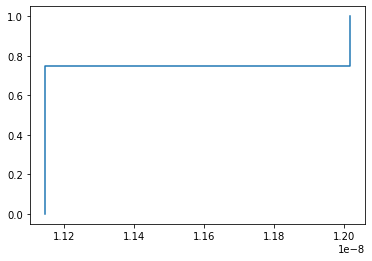

In [161]:
P = p[27]
QOI = q_x[27,:,10]

index = np.argsort(QOI)
plt.plot(np.ravel([QOI[index],QOI[index]],'f'),np.ravel([np.array([0,*np.cumsum(P[index])[:-1]]),np.cumsum(P[index])],'F'))

In [156]:
np.ravel([QOI[index],QOI[index]],'f')

(128,)

In [106]:
q_y[4,:,10].shape

(64,)

In [75]:
np.linspace(0,1,64).shape

(65,)

In [36]:
p

array([[5.00000000e-01, 5.00000000e-01, 1.86003799e-44, ...,
        1.86003799e-44, 1.86003799e-44, 1.86003799e-44],
       [5.00000000e-01, 5.00000000e-01, 1.86003799e-44, ...,
        1.86003799e-44, 1.86003799e-44, 1.86003799e-44],
       [5.00000000e-01, 5.00000000e-01, 1.86003799e-44, ...,
        1.86003799e-44, 1.86003799e-44, 1.86003799e-44],
       ...,
       [3.12500000e-02, 3.12500000e-02, 3.12500000e-02, ...,
        1.16252374e-45, 1.16252374e-45, 1.16252374e-45],
       [3.12500000e-02, 3.12500000e-02, 3.12500000e-02, ...,
        1.16252374e-45, 1.16252374e-45, 1.16252374e-45],
       [3.12500000e-02, 3.12500000e-02, 3.12500000e-02, ...,
        1.16252374e-45, 1.16252374e-45, 1.16252374e-45]])

In [18]:
# x1_2d = k_y[epoch,:,:]
# w1 = p[epoch,:]
# d1 = sm.DescrStatsW(x1_2d, weights=w1)
# df_mean = d1.mean
# df_perc = d1.quantile([0.25,0.5,0.75]).values.T

In [19]:
# b_perc =df_perc


In [37]:
def plot_k(t,k,p,epoch):
    x1_2d = k[epoch,:,:]
    w1 = p[epoch,:]
    d1 = sm.DescrStatsW(x1_2d, weights=w1)
    df_mean = d1.mean
    df_perc = d1.quantile([0.25,0.5,0.75]).values.T
    b_perc =df_perc

    plt.fill_between(t,b_perc[:,0],b_perc[:,2],color=cm.get_cmap('tab20c')(3))
    plt.plot(t,b_perc[:,0], linewidth=2.5,label=r'$10^{th} / 90^{th}   percentile$',color=cm.get_cmap('tab20c')(0))
    plt.plot(t,b_perc[:,2], linewidth=2.5,color=cm.get_cmap('tab20c')(0))
    plt.plot(t,df_mean,linewidth=2.5,label=r'$Mean$',ls='--',color=cm.get_cmap('tab20c')(5))
    


In [40]:
epoch = 100
t = np.linspace(0,1800,N_steps)

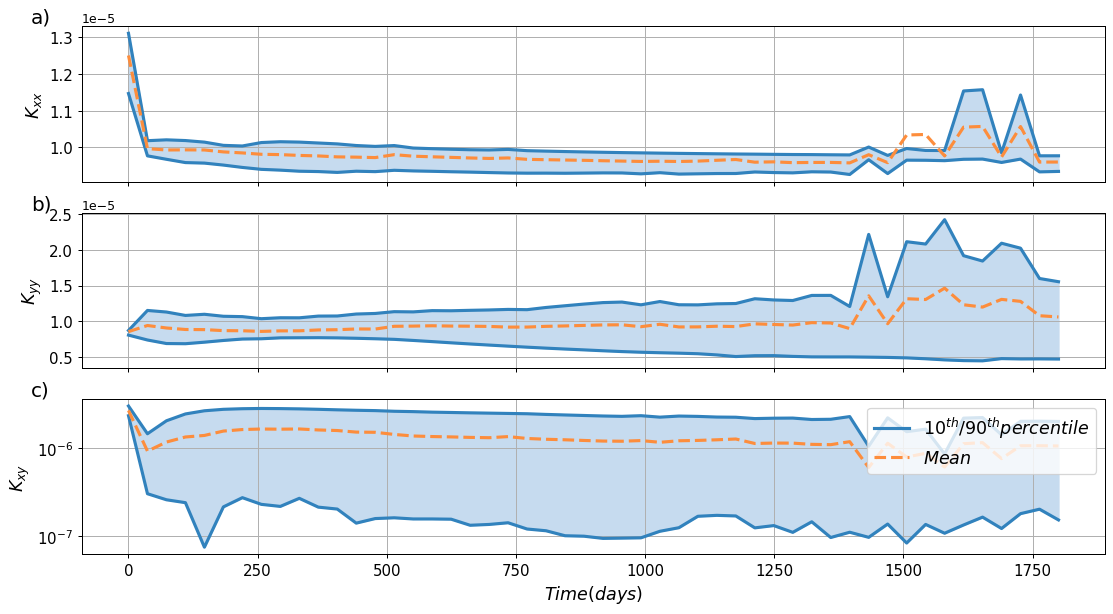

In [181]:
my_dpi = 90
fig, axs = plt.subplots(3, 1, figsize=(1100/my_dpi, 600/my_dpi), dpi=my_dpi)
fig.subplots_adjust(left=0.02, bottom=0.06, right=0.95, top=0.94, wspace=0.15)

ax1 = plt.subplot(311)
plot_k(t,k_x,p,epoch)
plt.yscale('linear')
plt.tick_params(axis='y',which='both', labelsize=12)
plt.grid()
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
ax1.text(-0.05, 1.02, 'a)', transform=ax1.transAxes,size=16)
plt.setp(ax1.get_xticklabels(), visible=False)
plt.ylabel(r'$K_{xx}$', fontsize= 14)


ax2 = plt.subplot(312)
plot_k(t,k_y,p,epoch)
plt.yscale('linear')
plt.tick_params(axis='y',which='both', labelsize=12)
plt.grid()
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
ax2.text(-0.05, 1.02, 'b)', transform=ax2.transAxes,size=16)
plt.setp(ax2.get_xticklabels(), visible=False)
plt.ylabel(r'$K_{yy}$', fontsize= 14)


ax3 = plt.subplot(313)
plot_k(t,np.abs(k_xy),p,epoch)
plt.yscale('symlog', linthreshy=1e-8)
plt.tick_params(axis='y',which='both', labelsize=12)
plt.tick_params(axis='x',which='both', labelsize=12)
plt.legend(loc=1, fontsize= 14)
plt.grid()
ax3.text(-0.05, 1.02, 'c)', transform=ax3.transAxes,size=16)
plt.ylabel(r'$K_{xy}$', fontsize= 14)

plt.xlabel(r'$Time (days)$', fontsize= 14)

plt.savefig('./../../../plots/2d_k_evo_paper.pdf', bbox_inches='tight',dpi=my_dpi)


In [42]:
p[200,:]

IndexError: index 200 is out of bounds for axis 0 with size 107